# **Analisis de Empleabilidad y Salarios del Sector de DataScience 2020-2025**

<image src="img/dataset-cover.jpg">

_____

## **TEMA**

Este proyecto se centra en realizar un Análisis Exploratorio de Datos (EDA) sobre ofertas de empleo en el sector de Data Science, utilizando datos recopilados entre 2020 y 2025. El objetivo principal es identificar tendencias, patrones y características clave del mercado laboral en este sector.

El análisis permitirá responder preguntas clave como:

- ¿Cuáles son los empleos más demandados?

- ¿Cómo han evolucionado los salarios en los últimos años?

- ¿Qué regiones ofrecen mejores oportunidades en términos de salario y empleabilidad?

- ¿Existen diferencias significativas en las ofertas según el tipo de empresa o el nivel de experiencia requerido?

Además, este estudio busca proporcionar información valiosa tanto para trabajadores que desean cambiar de carrera como para estudiantes que evalúan formarse en este campo. También puede ser una herramienta útil para instituciones educativas interesadas en ajustar sus programas a la realidad del mercado.

## **CONTEXTO**

Siempre que consideramos iniciar una carrera en un nuevo sector laboral, surgen múltiples dudas e incertidumbres. ¿Es una industria en crecimiento? ¿Qué habilidades necesito? ¿Cuál es el salario promedio? ¿Qué tan competitivo es el mercado?

El sector de Data Science ha sido ampliamente promovido como una de las profesiones más prometedoras de la actualidad, con alta demanda y sueldos atractivos. Sin embargo, muchos aspirantes y profesionales en transición encuentran difícil validar estas afirmaciones con datos concretos.

Este análisis busca proporcionar una visión basada en datos sobre la empleabilidad y salarios en el sector de Data Science, respondiendo preguntas fundamentales para quienes desean tomar decisiones informadas sobre su futuro profesional.

## **HIPOTESIS**

- La demanda de empleos relacionados con los datos a aumentado en los ultimos años y muestra indicios de seguir aumentando
- Los salarios tienden a superar la mediana de la poblacion. Alrededor de que porciento de la poblacion (percentiles) se encuentran los salarios?
- En el sector se aprecia un alto inidice de empleos remotos o hibridos que va en aumento con el paso de los años
- Estados unidos se corona como el pais donde mas demanda del sector hay. En Europa la mayoria de empleos se encontraran en paises como Inglaterra y Alemania, y España estara entre los 10 primeros
- Las empresas grandes no son necesariamente las que mejor pagan. Cual es la relacion entre la experiencia de trabajo y la demanda de esta segun el tamaño de la empresa?. A que tipo de empresa es mas coveniente ir segun la experiencia en el sector?

## **OBTENCION DE LOS DATOS**

### __FUENTES DE DATOS__   
- Kaggle: The AI, ML, Data Science Salary (2020- 2025) DataSet - [ [Link](https://www.kaggle.com/datasets/samithsachidanandan/the-global-ai-ml-data-science-salary-for-2025) ]
- stack***overflow*** : Developer Surveys - [ [Link](https://survey.stackoverflow.co/2024/work/) ]
- Manfred : Tech Career Report - **$**.alarios - [ [Link](https://www.getmanfred.com/blog/tech-career-report-alarios) ]

### **IMPORTACION DE LIBRERIAS**

In [214]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify 
from scipy.interpolate import make_interp_spline

import warnings
warnings.filterwarnings('ignore')

In [215]:
plt.style.use('seaborn-v0_8-white')

## **DATA UNDERSTANDING**

### __Muestra de las primeras 10 entradas del DataSet__   

In [216]:
jobs = pd.read_csv('./data/salaries.csv')
jobs.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,MI,FT,Customer Success Manager,57000,EUR,60000,NL,50,NL,L
1,2025,SE,FT,Engineer,165000,USD,165000,US,0,US,M
2,2025,SE,FT,Engineer,109000,USD,109000,US,0,US,M
3,2025,SE,FT,Applied Scientist,294000,USD,294000,US,0,US,M
4,2025,SE,FT,Applied Scientist,137600,USD,137600,US,0,US,M


### __Muestra de infromacion general del DataSet__   

In [217]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88584 entries, 0 to 88583
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           88584 non-null  int64 
 1   experience_level    88584 non-null  object
 2   employment_type     88584 non-null  object
 3   job_title           88584 non-null  object
 4   salary              88584 non-null  int64 
 5   salary_currency     88584 non-null  object
 6   salary_in_usd       88584 non-null  int64 
 7   employee_residence  88584 non-null  object
 8   remote_ratio        88584 non-null  int64 
 9   company_location    88584 non-null  object
 10  company_size        88584 non-null  object
dtypes: int64(4), object(7)
memory usage: 7.4+ MB


### __Muestra de datos estadisticos generales del DataSet__   

In [218]:
jobs.describe().round()

,work_year,salary,salary_in_usd,remote_ratio
count,88584.0,88584.0,88584.0,88584.0
mean,2024.0,161932.0,157568.0,21.0
std,1.0,196532.0,73531.0,41.0
min,2020.0,14000.0,15000.0,0.0
25%,2024.0,106000.0,106097.0,0.0
50%,2024.0,147000.0,146307.0,0.0
75%,2024.0,199500.0,198600.0,0.0
max,2025.0,30400000.0,800000.0,100.0


In [219]:
jobs.duplicated(keep=False).value_counts()

True     57669
False    30915
Name: count, dtype: int64

## **DATA CLEANIG**

### __Eliminar puestos no relacionados con Data Science__

In [220]:
key_words = ('Data','Machine Learning', 'Analyst', 'Analysis', 'Analytics','Bussiness Intelligence', 'AI', 'BI', 'Decision Scientist','Computer Vision', 'NLP', 'ML', 'Artificial Intelligence','Deep Learning', 'ETL')

jobs = jobs[jobs['job_title'].str.contains('|'.join(key_words))]


### __Comprobar que todos los puestos filtrados esten relacionados con Data Science__

In [221]:
print(jobs['job_title'].unique()[:10])  ## Slicing de 10 para mantener el jupyter organizado

['Data Analyst' 'Data Scientist' 'AI Data Scientist'
 'Admin & Data Analyst' 'Data Management Specialist' 'Data Product Owner'
 'Machine Learning Engineer' 'Data Engineer' 'Data Operations Engineer'
 'Analytics Engineer']


### __Eliminar puestos del año 2025__ 
  - ***Los datos recojen una pequeña parte del año que no representa una muestra para poder usar en el EDA***

In [222]:
jobs = jobs[jobs['work_year'] != 2025]

### __Eliminar puestos ejecutivos para disminuir el sesgo de los datos__   
  - ***Presentar antes un pequeño resumen***

In [223]:
# medians = {
#     'EN': jobs[jobs['experience_level'] == 'EN']['salary_in_usd'],
#     'MI': jobs[jobs['experience_level'] == 'MI']['salary_in_usd'].median(),
#     'SE': jobs[jobs['experience_level'] == 'SE']['salary_in_usd'].median(),
#     'EX': jobs[jobs['experience_level'] == 'EX']['salary_in_usd'].median()
# }


# temp = pd.DataFrame(medians['EN'].value_counts())
# temp = temp.reset_index()
# temp = temp[temp['count'] > 1]
# temp.to_csv("EN.csv")

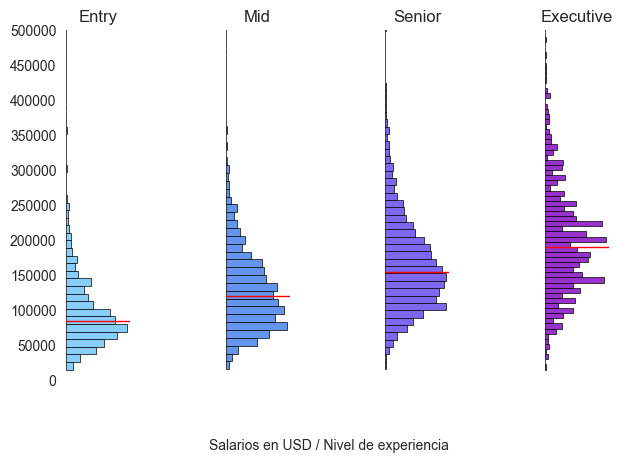

In [224]:

fig, ax = plt.subplots(1, 4, sharey=True, figsize=(7, 5))

medians = {
    'EN': jobs[jobs['experience_level'] == 'EN']['salary_in_usd'].median(),
    'MI': jobs[jobs['experience_level'] == 'MI']['salary_in_usd'].median(),
    'SE': jobs[jobs['experience_level'] == 'SE']['salary_in_usd'].median(),
    'EX': jobs[jobs['experience_level'] == 'EX']['salary_in_usd'].median()
}



ax[0].hist(x=jobs[jobs['experience_level'] == 'EN']['salary_in_usd'], bins=70, edgecolor='black', color='#87CEFA', orientation='horizontal', linewidth=0.5)
ax[0].axhline(medians['EN'], color='red', linestyle='-', linewidth=1)
ax[0].set_title('Entry')
ax[0].set_xticks([])

ax[1].hist(x=jobs[jobs['experience_level'] == 'MI']['salary_in_usd'], bins=70, edgecolor='black', color='#6495ED', orientation='horizontal', linewidth=0.5)
ax[1].axhline(medians['MI'], color='red', linestyle='-', linewidth=1)
ax[1].set_title('Mid')
ax[1].set_xticks([])

ax[2].hist(x=jobs[jobs['experience_level'] == 'SE']['salary_in_usd'], bins=70, edgecolor='black', color='#7B68EE', orientation='horizontal', linewidth=0.5)
ax[2].axhline(medians['SE'], color='red', linestyle='-', linewidth=1)
ax[2].set_title('Senior')
ax[2].set_xticks([])

ax[3].hist(x=jobs[jobs['experience_level'] == 'EX']['salary_in_usd'], bins=70, edgecolor='black', color='#9932CC', orientation='horizontal', linewidth=0.5)
ax[3].axhline(medians['EX'], color='red', linestyle='-', linewidth=1)
ax[3].set_title('Executive')
ax[3].set_xticks([])

ax[0].set_yticks(np.arange(0,500001,50000))
ax[0].set_ylim(-50000, 500000)

[spine.set_visible(False) for ax in ax.ravel() for spine in ax.spines.values()]

plt.subplots_adjust(wspace=1.5)

fig.text(0.5, 0.04, 'Salarios en USD / Nivel de experiencia', ha='center', fontsize=10)  # X-axis label

plt.show()

In [225]:
jobs = jobs[jobs['experience_level'] != 'EX']

### **Verificacion de duplicados**

In [226]:
jobs.duplicated(keep=False).value_counts()

True     30336
False    14252
Name: count, dtype: int64

In [227]:
jobs[(jobs.duplicated(keep=False)) == True]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
15842,2024,MI,FT,Analytics Engineer,720000,USD,720000,US,0,US,M
15843,2024,MI,FT,Analytics Engineer,170000,USD,170000,US,0,US,M
15844,2024,MI,FT,Analytics Engineer,720000,USD,720000,US,0,US,M
15845,2024,MI,FT,Analytics Engineer,170000,USD,170000,US,0,US,M
15847,2024,MI,FT,Analytics Engineer,100000,USD,100000,US,100,US,M
...,...,...,...,...,...,...,...,...,...,...,...
88426,2021,MI,FT,Data Engineer,200000,USD,200000,US,100,US,L
88431,2021,EN,FT,Data Scientist,90000,USD,90000,US,100,US,S
88502,2021,MI,FT,Data Scientist,76760,EUR,90734,DE,50,DE,L
88506,2021,EN,FT,Data Scientist,90000,USD,90000,US,100,US,S


***Se llega a al conclusion de que pueden haber trabajos que compartan los mismos datos por lo tanto, al no haber indicio de haber creado duplicados en modifiaciones anteriores, se mantiene el DataSet tal cual esta***

### **Nuevos datos y transformaciones**

- **Se genera un nuevo csv con los datos de los "Develper Surveys" de stack*overflow* y se guarda en la carpeta de "data" - [ [JUPYTER](notebooks\stack_overflow.ipynb) ]**

## **Data ANALYSIS**

### **Comportamiento de demanda de empleo a traves de los años**

In [228]:
jobs_by_year = jobs.groupby('work_year')['job_title'].count()
jobs_by_year

work_year
2020       69
2021      197
2022     1575
2023     7357
2024    35390
Name: job_title, dtype: int64

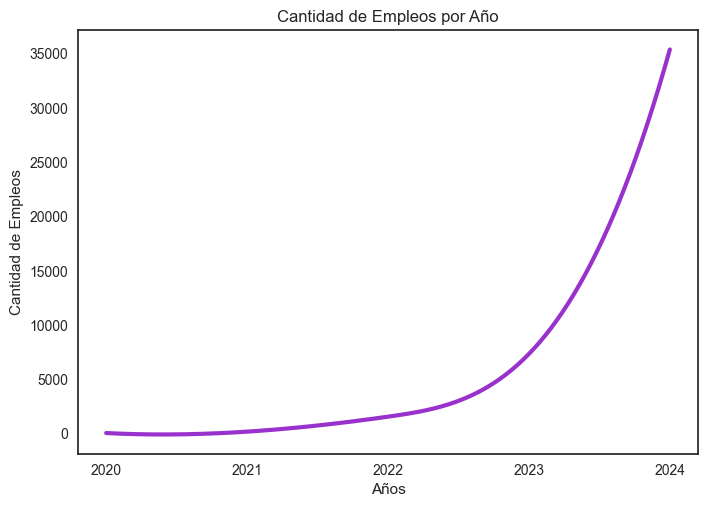

In [229]:
jobs_by_year = jobs.groupby('work_year')['job_title'].count()

x = jobs_by_year.index
y = jobs_by_year.values

# Spline interpolation for smoothing
x_smooth = np.linspace(x.min(), x.max(), 300)  # Generate more points for a smooth curve
spline = make_interp_spline(x, y, k=3)  # Cubic spline
y_smooth = spline(x_smooth)

plt.plot(x_smooth, y_smooth, color='#9932CC', lw=3)
plt.title('Cantidad de Empleos por Año')
plt.xlabel('Años')
plt.ylabel('Cantidad de Empleos')
plt.xticks(x)

plt.show()

La cantidad de empleos en Data Science ha mostrado un crecimiento constante en los últimos años, lo que indica una mayor demanda de profesionales en el sector.

### **Comportamiento de los salarios a traves de los años**

In [230]:
so_dev_salary = pd.read_csv('data\SO_dev_salary.csv')

so_dev_salary['salaries'] = so_dev_salary['salaries'].astype(int)
so_dev_salary = so_dev_salary.groupby('year')[['salaries']].mean()
so_dev_salary

,salaries
year,
2020,56550.000000
2021,59877.208333
2022,72621.678571
2023,81373.875000
2024,72704.303030


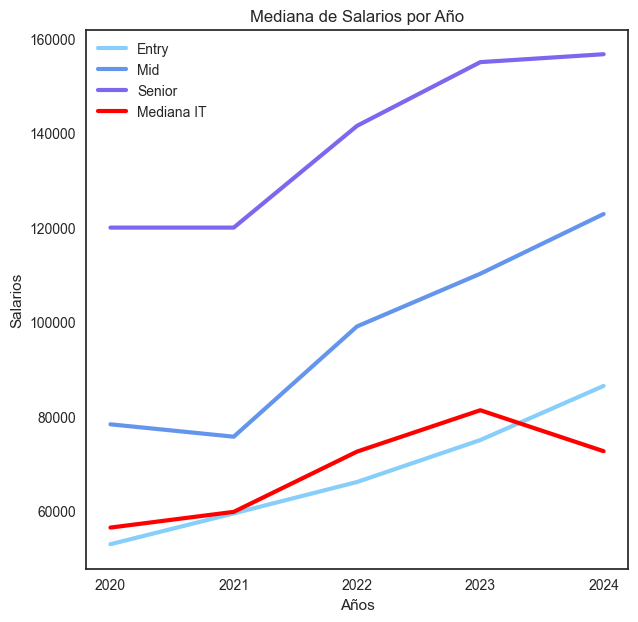

In [231]:

so_dev_salary = pd.read_csv('data\SO_dev_salary.csv')

so_dev_salary['salaries'] = so_dev_salary['salaries'].astype(int)
so_dev_salary = so_dev_salary.groupby('year')[['salaries']].mean()


jobs_by_xp = jobs.groupby(['experience_level', 'work_year'])[['salary_in_usd']].median()

plt.figure(figsize=(7,7));
plt.plot(jobs_by_xp.loc["EN"], label="Entry", color='#87CEFA', lw=3)
plt.plot(jobs_by_xp.loc["MI"], label="Mid", color='#6495ED', lw=3)
plt.plot(jobs_by_xp.loc["SE"], label="Senior", color='#7B68EE', lw=3)
# plt.axhline(100000, color='red', label='Mediana IT', lw=3) ## INFORMACION COMPARATIVA DE MEDIANA DE IT
plt.plot(so_dev_salary, color='red', label='Mediana IT', lw=3)


plt.legend()
plt.title('Mediana de Salarios por Año')
plt.xlabel('Años')
plt.ylabel('Salarios')
plt.xticks([2020,2021,2022,2023,2024])

plt.show()

- **Media Salarial Manfred 2024 : €40.731**

Los salarios en Data Science son competitivos y generalmente superiores a la mediana de la industria IT. Se observa un aumento en los salarios a lo largo de los años, especialmente en niveles Senior.

### **Comportamiento de las modalidades ( Remoto, Hibrido y Presencial ) a traves de los años**

In [232]:
remote_ratios = pd.DataFrame(jobs.groupby(['work_year'])['remote_ratio'].value_counts(normalize=True) *100)

remote_ratios = remote_ratios.reset_index()
remote_ratios

pivoted_ratios = remote_ratios.pivot(index='work_year', columns='remote_ratio', values='proportion')
pivoted_ratios

remote_ratio,0,50,100
work_year,,,
2020,23.188406,27.536232,49.275362
2021,12.690355,32.487310,54.822335
2022,43.809524,3.428571,52.761905
2023,66.209053,0.897105,32.893843
2024,78.369596,0.132806,21.497598


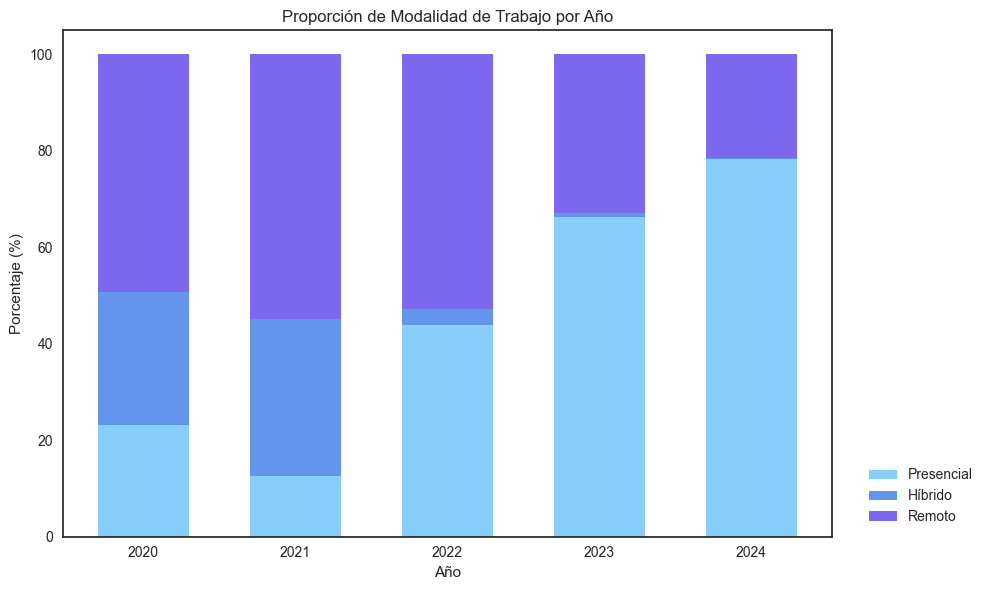

In [233]:
remote_ratios = pd.DataFrame(jobs.groupby(['work_year'])['remote_ratio'].value_counts(normalize=True) *100)

remote_ratios = remote_ratios.reset_index()
remote_ratios

pivoted_ratios = remote_ratios.pivot(index='work_year', columns='remote_ratio', values='proportion')
pivoted_ratios



fig, ax = plt.subplots(figsize=(10, 6))

bar_positions = pivoted_ratios.index
bar_width = 0.6


ax.bar(bar_positions, pivoted_ratios[0], label='Presencial', color='#87CEFA', width=bar_width)
ax.bar(bar_positions, pivoted_ratios[50], bottom=pivoted_ratios[0], label='Híbrido', color='#6495ED', width=bar_width)
ax.bar(bar_positions, pivoted_ratios[100], bottom=pivoted_ratios[0] + pivoted_ratios[50], label='Remoto', color='#7B68EE', width=bar_width)


ax.set_title('Proporción de Modalidad de Trabajo por Año')
ax.set_xlabel('Año')
ax.set_ylabel('Porcentaje (%)')
ax.set_xticks(bar_positions)
ax.set_xticklabels(pivoted_ratios.index)
ax.legend(loc='lower right', bbox_to_anchor=(1.2,0))

plt.tight_layout()
plt.show()


Los empleos de caracter remoto han perdido terreno frente a los presenciales despues del 2021, esto probablemente se deba la finalizacion de las restricciones por el Covid.

### **Que paises lideran en el sector de Data Science**

In [234]:
countries = pd.DataFrame(jobs['company_location'].value_counts())
countries = countries.reset_index()
main = countries.iloc[:10]
main
# others = countries.iloc[10:]
# others['count'].sum()

,company_location,count
0,US,39483
1,GB,1666
2,CA,1588
3,DE,180
4,AU,164
5,ES,149
6,FR,143
7,NL,114
8,IN,98
9,LT,94


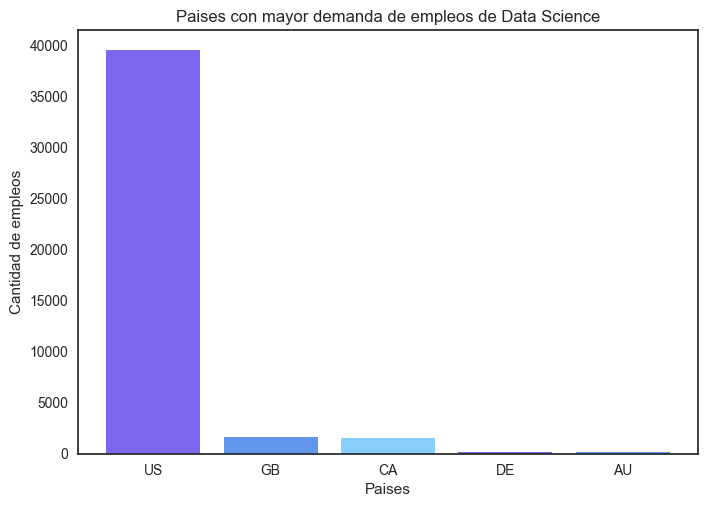

In [235]:
countries = pd.DataFrame(jobs['company_location'].value_counts())
countries = countries.reset_index()

plt.bar(data=countries.iloc[:5], x='company_location', height='count', color=['#7B68EE', '#6495ED', '#87CEFA'])
plt.title('Paises con mayor demanda de empleos de Data Science')
plt.xlabel('Paises')
plt.ylabel('Cantidad de empleos')

plt.show()

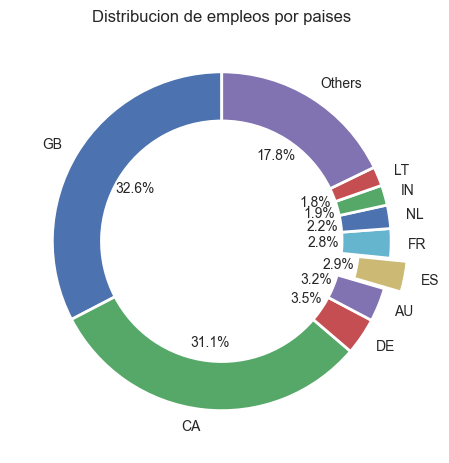

In [236]:
main = countries[countries['company_location'] != "US"] # & (countries['company_location'] != "CA") & (countries['company_location'] != "IN")'''
main = main.iloc[:9]
others = countries.iloc[10:]['count'].sum()

sizes = main['count'].tolist() + [others]
labels = main['company_location'].tolist() + ['Others']

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops={'linewidth': 2, 'edgecolor': 'white','width': 0.29}, explode=[0.1 if label == 'ES' else 0 for label in labels])

plt.title('Distribucion de empleos por paises')
plt.show()

Estados Unidos se mantiene como el indiscutible lider del sector, seguido de Gran Bretaña y Canada, ambos paises de habla inglesa. España se encuentra entre los primeros puestos, haciendo todas estas, opciones viables en el momento de buscar empleos

### **Comportamineto de los salarios segun los tipos de compañia**

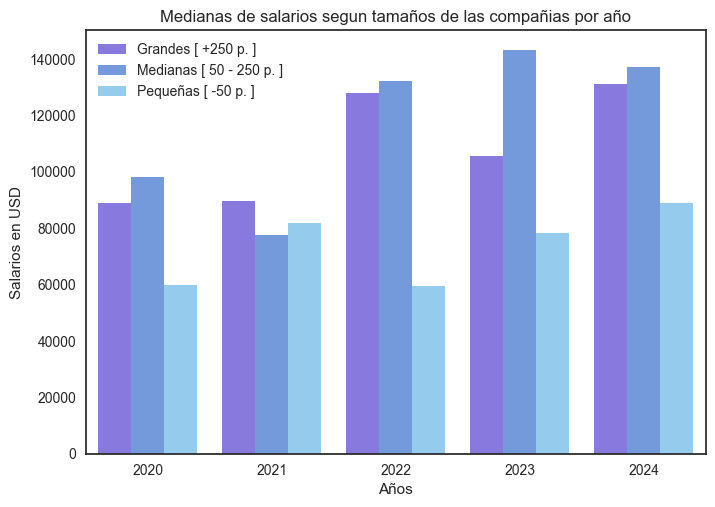

In [237]:
company_sizes = pd.DataFrame(jobs.groupby(['work_year','company_size'])['salary_in_usd'].median())
company_sizes = company_sizes.reset_index()
company_sizes

company_sizes['company_size'][company_sizes['company_size'] == 'L'] = 'Grandes [ +250 p. ]'
company_sizes['company_size'][company_sizes['company_size'] == 'M'] = 'Medianas [ 50 - 250 p. ]'
company_sizes['company_size'][company_sizes['company_size'] == 'S'] = 'Pequeñas [ -50 p. ]'


sns.barplot(data=company_sizes, x='work_year', y='salary_in_usd', hue='company_size', palette=['#7B68EE', '#6495ED', '#87CEFA'])

plt.legend()
plt.title('Medianas de salarios segun tamaños de las compañias por año')
plt.ylabel("Salarios en USD")
plt.xlabel('Años')

plt.show()

- **Selecionando el ultimo año y añadiendo el nivel de experiencia**

In [238]:
xp_sizes = pd.DataFrame(jobs[(jobs['work_year']==2024)].groupby(['experience_level','company_size'])['salary_in_usd'].median())
xp_sizes = xp_sizes.reset_index()
xp_sizes

,experience_level,company_size,salary_in_usd
0,EN,L,91200.0
1,EN,M,86000.0
2,EN,S,43500.0
3,MI,L,127600.0
4,MI,M,122100.0
5,MI,S,70000.0
6,SE,L,151300.0
7,SE,M,157000.0
8,SE,S,120000.0


Text(0.5, 0, 'Nivel de Experiencia')

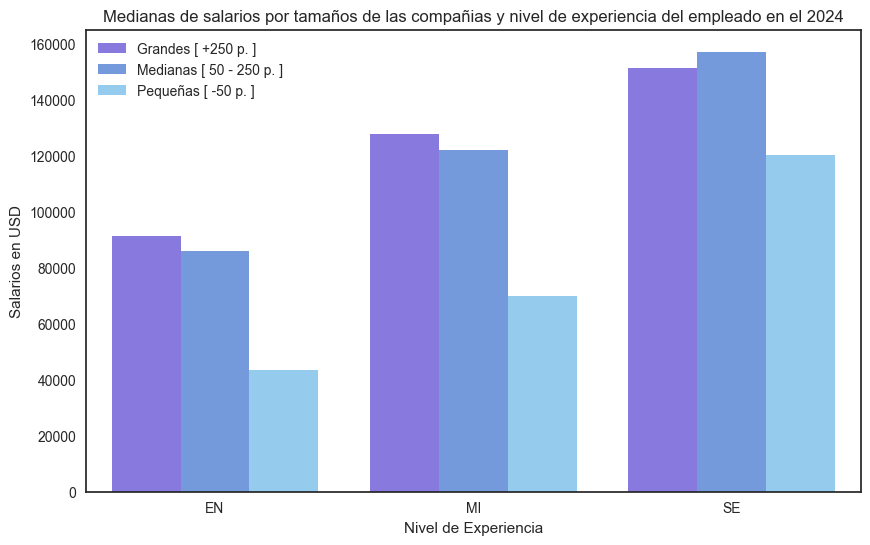

In [239]:
xp_sizes = pd.DataFrame(jobs[(jobs['work_year']==2024)].groupby(['experience_level','company_size'])['salary_in_usd'].median())
xp_sizes = xp_sizes.reset_index()
xp_sizes

xp_sizes['company_size'][xp_sizes['company_size'] == 'L'] = 'Grandes [ +250 p. ]'
xp_sizes['company_size'][xp_sizes['company_size'] == 'M'] = 'Medianas [ 50 - 250 p. ]'
xp_sizes['company_size'][xp_sizes['company_size'] == 'S'] = 'Pequeñas [ -50 p. ]'


plt.figure(figsize=(10,6))
sns.barplot(data=xp_sizes, x='experience_level', y='salary_in_usd', hue='company_size', palette=['#7B68EE', '#6495ED', '#87CEFA'])

plt.legend()
plt.title('Medianas de salarios por tamaños de las compañias y nivel de experiencia del empleado en el 2024')
plt.ylabel("Salarios en USD")
plt.xlabel('Nivel de Experiencia')

Las grandes y medianas empresas son las opciones mas destacables a la hora de elegir a que tipo de empresas queremos aplicar, aun asi, habra variaciones en dependencia del nivel de experiencia del empleado

### **Comprobando cuales son los empleos mas demandados**

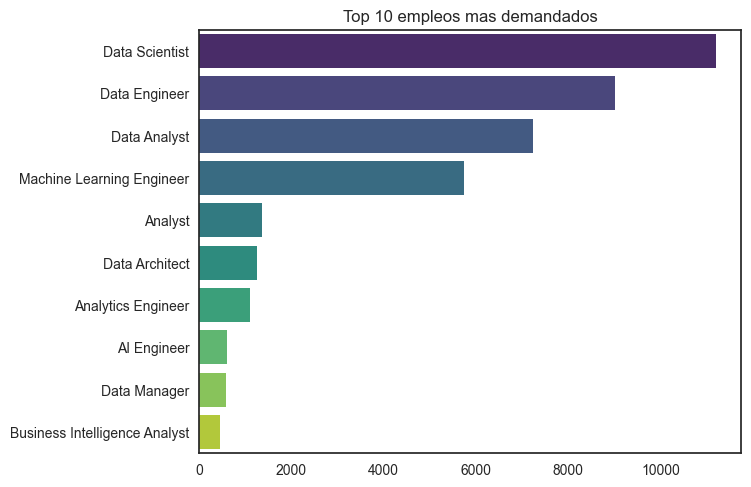

In [271]:
plt.figure(figsize=(7,5.5))
sns.countplot(data=jobs, y='job_title', order=jobs['job_title'].value_counts().head(10).index, palette='viridis')

plt.title('Top 10 empleos mas demandados')
plt.xlabel('')
plt.ylabel('')

plt.show()


### **Buscando los empleos con mejor salario promedio**

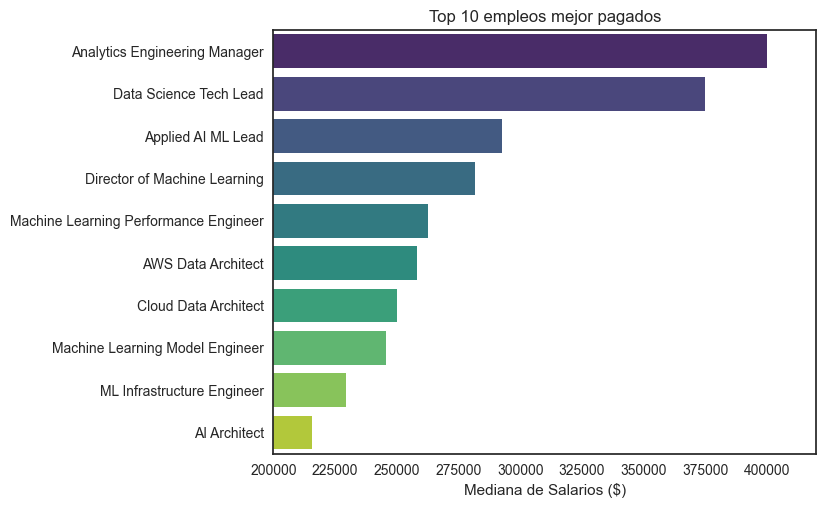

In [267]:
salary_rank = jobs.groupby('job_title')[['salary_in_usd']].mean()
salary_rank = salary_rank.reset_index()
salary_rank = salary_rank.sort_values(by='salary_in_usd', ascending=False).head(10)
salary_rank = salary_rank.reset_index().drop(columns="index")

salary_rank['salary_in_usd'] = salary_rank['salary_in_usd'].round()

plt.figure(figsize=(7,5.5))
sns.barplot(data=salary_rank, y=salary_rank['job_title'], x=salary_rank['salary_in_usd'], palette='viridis')
plt.title('Top 10 empleos mejor pagados')
plt.xlabel('Mediana de Salarios ($)')
plt.ylabel('')
plt.xlim(200000,)


plt.show()

No existe una correlacion positiva entre los empleos mas demandados y los mejores pagados, ambas deducciones pueden ser utiles a la hora de buscar empleo, sobre todo si se tiene en cuenta el nivel de experiencia. 

## **CONCLUSIONES**

El análisis de empleabilidad y salarios en el sector de Data Science durante el período 2020-2025 ha permitido extraer varias conclusiones clave:

1. **Crecimiento y estabilidad del sector**   
La demanda de profesionales en Data Science ha mostrado un crecimiento sostenido en los últimos años, con indicios de seguir aumentando. Esto confirma que es un campo con alta estabilidad laboral y buenas perspectivas de empleo.

2. **Tendencias salariales**    
Los salarios en el sector tienden a estar por encima de la mediana salarial de la población general. Sin embargo, existen diferencias significativas según el nivel de experiencia, el tipo de empresa y la ubicación geográfica. Las grandes empresas tecnológicas y el sector financiero suelen ofrecer mejores compensaciones.

3. **Competencias más valoradas**   
Las habilidades más solicitadas en las ofertas de empleo incluyen programación en Python y SQL, manejo de herramientas de Machine Learning, conocimientos en estadística y experiencia con plataformas de análisis de datos. El dominio de tecnologías en la nube y habilidades en Big Data también son cada vez más relevantes.

4. **Diferencias geográficas en la empleabilidad**   
Las regiones con mayor demanda de profesionales en Data Science coinciden con centros tecnológicos y financieros. Paises como Estados Unidos, Canda y Gran Breataña presentan las mejores oportunidades en términos salariales y volumen de ofertas.

5. **Oportunidades y desafíos**

   - Para los nuevos profesionales, la clave para ingresar al sector radica en la capacitación continua y en la adquisición de experiencia práctica mediante proyectos y certificaciones.

   - Para las empresas, la competencia por talento calificado es un reto, lo que lleva a la implementación de estrategias de retención como beneficios adicionales y formación interna.

### **Futuras líneas de trabajo**   
Este análisis podría complementarse con estudios más detallados sobre la evolución de las tecnologías demandadas, la tasa de rotación en el sector y la relación entre educación formal y empleabilidad. También sería interesante analizar la influencia de la inteligencia artificial en la automatización de roles dentro de Data Science o Data Analysis.